In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode
import statistics
from collections import Counter
import datetime
import seaborn as sns
import math
pd.options.mode.chained_assignment = None

%matplotlib inline

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

olist_customers_dataset_url = 'https://disk.yandex.ru/d/L2cwpLgsSxvlxg'
olist_orders_dataset_url = 'https://disk.yandex.ru/d/_ZtcY9Exzs6ReQ'
olist_order_items_dataset_url = 'https://disk.yandex.ru/d/r1t7Ow-bl_E5VQ'

In [3]:
olist_customers_dataset_final_url = base_url + urlencode(dict(public_key=olist_customers_dataset_url)) 
response = requests.get(olist_customers_dataset_final_url) 
download_url = response.json()['href']

download_response = requests.get(download_url) 
olist_customers_database = pd.read_csv(download_url) 

In [4]:
# Таблица с инф. о пользователях.
olist_customers_database.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
olist_customers_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
olist_customers_database.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Кажется, с таблицей, в которой хранится информация о покупателях, все хорошо. Пропусков нет, неуникальные id покупателей не повторяются.

In [7]:
olist_orders_final_url = base_url + urlencode(dict(public_key=olist_orders_dataset_url)) 
response = requests.get(olist_orders_final_url) 
download_url = response.json()['href']

download_response = requests.get(download_url) 
olist_orders_database = pd.read_csv(download_url) 

In [8]:
# Таблица с инф. о статусе заказов.
olist_orders_database.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [9]:
olist_orders_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
olist_orders_database.order_id.nunique()

99441

В таблице с информацией о статусе заказов есть несколько колонок с пропусками, главное не повторяются id заказов.

In [11]:
olist_order_items_final_url = base_url + urlencode(dict(public_key=olist_order_items_dataset_url)) 
response = requests.get(olist_order_items_final_url) 
download_url = response.json()['href']

download_response = requests.get(download_url) 
olist_order_items_database = pd.read_csv(download_url) 

In [12]:
# Таблица с инф. о заказах.
olist_order_items_database.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [13]:
olist_order_items_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
olist_order_items_database.order_id.nunique() - olist_orders_database.order_id.nunique()

-775

В таблице с информацией о заказах отсутствуют 775 заказов.

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для начала нужно определить, что можно считать покупкой.  

Интересен статус invoiced, который означает выставленный счет.

In [15]:
olist_orders_database.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [16]:
olist_orders_database.query('order_status == "invoiced"').head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaN,NaN,2017-08-28 00:00:00


In [17]:
olist_orders_database.query('order_status == "invoiced"').shape[0]

314

In [18]:
olist_orders_database.query('order_status == "invoiced"').order_approved_at.notna().sum()

314

In [19]:
olist_orders_database.query('order_status == "invoiced"').order_delivered_carrier_date.isna().sum()

314

Всего таких заказов 314. У них у всех есть подтверждения и ни у одного нет даты отправки.  

Значит нужно посмотреть на заказы с датой отправки, скорее всего товар отправляют после оплаты выставленного счета.

In [20]:
olist_orders_database.query('order_delivered_carrier_date.notna()').order_status.value_counts()

delivered    96476
shipped       1107
canceled        75
Name: order_status, dtype: int64

У заказов с датой отправки видим всего несколько статусов: доставлен, отправлен, отменен.  
Исходя из данных статусов можно считать, что все так, как и предполагалось. После оплаты товар отправляют покупателю.  
Я буду считать покупкой только те заказы, которые находятся в пути или уже были доставлены, заказы с отмененным статусом считать за покупку нельзя, потому что за них могли вернуть деньги(тут данных нет).

In [21]:
purchases = olist_orders_database.query('order_delivered_carrier_date.notna() and order_status != "canceled"')

In [22]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97583 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       97583 non-null  object
 1   customer_id                    97583 non-null  object
 2   order_status                   97583 non-null  object
 3   order_purchase_timestamp       97583 non-null  object
 4   order_approved_at              97569 non-null  object
 5   order_delivered_carrier_date   97583 non-null  object
 6   order_delivered_customer_date  96469 non-null  object
 7   order_estimated_delivery_date  97583 non-null  object
dtypes: object(8)
memory usage: 6.7+ MB


Кажется, что у нас есть несколько заказов без подтверждения, но с датой отгрузки, а также заказы без даты доставки. Нужно избавиться от всех заказов без подтверждения(не совсем ясно как такие заказы могли пройти) и заказов без даты доставки со статусом доставлен.  
Я хочу рассмотреть только покупки без каких-либо ошибок.

In [23]:
purchases = purchases.query('order_approved_at.notna()')

In [24]:
purchases = purchases.query('order_delivered_customer_date.notna() or order_status == "shipped"')

Добавим в таблицу с покупками уникальный id пользователя, чтобы посмотреть кол-во покупок для каждого покупателя.

In [25]:
purchases = purchases.merge(olist_customers_database[['customer_id', 'customer_unique_id']], how='left', on='customer_id')

In [26]:
mv_col = purchases.pop('customer_unique_id')
purchases.insert(2, 'customer_unique_id', mv_col)

Теперь можно посчитать кол-во пользователей, которые совершили 1 покупку.

In [27]:
purchases.groupby('customer_unique_id', as_index=False) \
    .agg({'order_id':'count'}) \
    .order_id.value_counts() \
    .head(1)

1    91517
Name: order_id, dtype: int64

Значит всего у нас 91517 клиентов, которые совершили всего 1 покупку.

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам).

Для начала возьмем из таблицы с заказами все статусы и дату предполагаемой доставки.

In [28]:
reasons_for_non_delivery = olist_orders_database[['order_status', 
                                                  'order_estimated_delivery_date']].query('order_status != "delivered"')

Максимальную дату, когда был доставлен товар, будем считать за текущую. Эта дата будет хоть какой-то границей для того, чтобы сказать, просрочен заказ или нет.

In [29]:
max_date = pd.to_datetime(olist_orders_database['order_delivered_customer_date']).max()

In [30]:
max_date

Timestamp('2018-10-17 13:22:46')

In [31]:
reasons_for_non_delivery['order_estimated_delivery_date'] = \
    pd.to_datetime(reasons_for_non_delivery['order_estimated_delivery_date'])

Оставим только просрочившиеся заказы.

In [32]:
reasons_for_non_delivery = reasons_for_non_delivery.query('order_estimated_delivery_date < @max_date')

Посмотрим на кол-во недоставленных заказов с разбиением по причинам.

In [33]:
reasons_for_non_delivery.groupby('order_status', as_index=False) \
    .agg({'order_estimated_delivery_date':'count'})

,order_status,order_estimated_delivery_date
0,approved,2
1,canceled,621
2,created,5
3,invoiced,314
4,processing,301
5,shipped,1107
6,unavailable,609


Добавим колонку с месяцем, когда не был доставлен заказ.

In [34]:
reasons_for_non_delivery['month'] = reasons_for_non_delivery['order_estimated_delivery_date'].astype('datetime64[M]')

Просуммируем по месяцам и причинам недоставленные заказы.

In [35]:
reasons_for_non_delivery = reasons_for_non_delivery.groupby(['month', 'order_status'], as_index=False) \
    .agg({'order_estimated_delivery_date': 'count'}) \
    .rename(columns={'order_estimated_delivery_date':'cnt'})

Переведем все в пивот и отсортируем по месяцам.

In [36]:
reasons_for_non_delivery_pivot = reasons_for_non_delivery.pivot(index='month',
                                                                columns='order_status',
                                                                values='cnt') \
                                                                .fillna(0) \
                                                                .reset_index()

In [37]:
 reasons_for_non_delivery_pivot.sort_values(by='month', inplace=True)

In [38]:
reasons_for_non_delivery_pivot

order_status,month,approved,canceled,created,invoiced,processing,shipped,unavailable
0,2016-09-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2016-10-01,0.0,3.0,0.0,0.0,0.0,1.0,0.0
2,2016-11-01,0.0,14.0,0.0,9.0,0.0,1.0,5.0
3,2016-12-01,0.0,8.0,0.0,9.0,2.0,7.0,2.0
4,2017-02-01,0.0,2.0,0.0,1.0,1.0,6.0,2.0
5,2017-03-01,1.0,26.0,0.0,21.0,38.0,41.0,66.0
6,2017-04-01,0.0,22.0,0.0,5.0,23.0,35.0,19.0
7,2017-05-01,1.0,23.0,0.0,19.0,12.0,60.0,16.0
8,2017-06-01,0.0,29.0,0.0,11.0,22.0,52.0,29.0
9,2017-07-01,0.0,21.0,0.0,10.0,13.0,51.0,34.0


In [39]:
reasons_for_non_delivery_pivot.iloc[:, 1:].mean()

order_status
approved        0.08
canceled       24.84
created         0.20
invoiced       12.56
processing     12.04
shipped        44.28
unavailable    24.36
dtype: float64

Не будем считать медиану, потому что большие значения особо не будут отличаться, но при этом нельзя будет увидеть, что у нас не доставляются заказы про причинам 'создан' и 'подтвержден'.  

В целом ничего сверхъестественного. Заказы отменяют, не оплачиваются после выставления счета, теряются во время доставки, теряются во время сборки.

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.


Возвращаемся к табличке с покупками. Создадим колонку с днем недели где 0 - пн и 6 - вс.

In [40]:
purchases['purchase_dayofweek'] = pd.to_datetime(purchases.order_purchase_timestamp).dt.dayofweek

Возьмем только id заказа и день недели.

In [41]:
order_dayofweek = purchases[['order_id', 'purchase_dayofweek']]

In [42]:
order_dayofweek.head(3)

,order_id,purchase_dayofweek
0,e481f51cbdc54678b7cc49136f2d6af7,0
1,53cdb2fc8bc7dce0b6741e2150273451,1
2,47770eb9100c2d0c44946d9cf07ec65d,2


Добавим id товаров, которые есть в заказах. Помним, что не все заказы есть в таблице с данными о заказах.

In [43]:
order_dayofweek = order_dayofweek.merge(olist_order_items_database[['order_id', 'product_id']], on='order_id', how='inner')

In [44]:
order_dayofweek.shape

(111358, 3)

Теперь возьмем товары и сделаем колонку со списком всех дней, когда покупался данный товар.

In [45]:
product_mode_dayofweek = order_dayofweek.groupby('product_id', as_index=False) \
    .agg({'purchase_dayofweek': list})

In [46]:
product_mode_dayofweek.tail()

,product_id,purchase_dayofweek
32419,fff6177642830a9a94a0f2cba5e476d1,"[6, 5]"
32420,fff81cc3158d2725c0655ab9ba0f712c,[0]
32421,fff9553ac224cec9d15d49f5a263411f,[4]
32422,fffdb2d0ec8d6a61f0a0a0db3f25b441,"[4, 3, 1, 1, 6]"
32423,fffe9eeff12fcbd74a2f2b007dde0c58,[2]


У товара может быть больше, 1 моды.  
statistics multimode отказывается работать, потому что версия питона на сервере, на котором выполнялась работа меньше 3.8, поэтому буду использовать это

In [47]:
def multimode(lst):
    
    '''Функция для расчета моды/мультимоды
    
    Аргументы:
    lst : list
        список дней, в которые покупался товар
    
    Возвращает:
    list с днем/днями, когда товар чаще всего покупают
    
    '''
    res  = [] 
    lst1 = Counter(lst)
    temp = lst1.most_common(1)[0][1]
    for ele in lst:
          if lst.count(ele) == temp:
                res.append(ele)
    return list(set(res))

Применим функцию на список дней каждого товара и получим моду.

In [48]:
product_mode_dayofweek['purchase_dayofweek'] = product_mode_dayofweek['purchase_dayofweek'].apply(lambda x: multimode(x))

In [49]:
product_mode_dayofweek.tail()

,product_id,purchase_dayofweek
32419,fff6177642830a9a94a0f2cba5e476d1,"[5, 6]"
32420,fff81cc3158d2725c0655ab9ba0f712c,[0]
32421,fff9553ac224cec9d15d49f5a263411f,[4]
32422,fffdb2d0ec8d6a61f0a0a0db3f25b441,[1]
32423,fffe9eeff12fcbd74a2f2b007dde0c58,[2]


В итоге имеем датафрейм, в котором хранятся id продуктов и дни, в которые их чаще всего покупают.

### 4. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Возьмем уникальные id клиентов и дату покупки.

In [50]:
order_date = purchases[['customer_unique_id', 'order_purchase_timestamp']] \
                        .rename(columns={'order_purchase_timestamp':'purchase_month'})

Приведем дату покупки к месяцам.

In [51]:
order_date['purchase_month'] = order_date['purchase_month'].to_numpy().astype('datetime64[M]')

In [52]:
order_date.head(3)

,customer_unique_id,purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-01
1,af07308b275d755c9edb36a90c618231,2018-07-01
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01


Возьмем первые покупки пользователей для формирования когорт.

In [53]:
first_purchase = order_date.groupby('customer_unique_id', as_index=False) \
    .agg({'purchase_month': 'min'}) \
    .rename(columns={'purchase_month':'first_month'})

Из них оставляем только когорты 2017 года.

In [54]:
first_purchase = first_purchase.query('first_month >= "2017-01-01" and first_month <= "2017-12-01"')

Из датафрейма с покупками выкидываем также все лишнее. Чтобы посмотреть на 3 месяц декабрьской когорты расширим диапазон дат на 3 месяца до 2018-03-01.

In [55]:
order_date = order_date.query('purchase_month >= "2017-01-01" and purchase_month <= "2018-03-01"')

Теперь объединяем таблицы и меняем дату покупки на номер месяца для формирования удобной retention таблицы.

In [56]:
retention_data = first_purchase.merge(order_date, on='customer_unique_id', how='left')

In [57]:
retention_data['first_rank'] = retention_data['first_month'].rank(method='dense')

In [58]:
retention_data['purchase_rank'] = retention_data['purchase_month'].rank(method='dense')

In [59]:
retention_data['month_num'] = retention_data['purchase_rank'] - retention_data['first_rank']

Теперь делаем пивот.

In [60]:
retention_data = retention_data.pivot_table(index='first_month', 
                                            columns='month_num', 
                                            values='customer_unique_id', 
                                            aggfunc='count') \
                               .reset_index()

И меняем кол-во купивших с 1 месяца на проценты.

In [61]:
retention_data.update(retention_data.iloc[:, 2:].div(retention_data[0], 0))

Выведем данные до 3 месяца, накинем стиль и посмотрим на проценты.

In [62]:
cm = sns.light_palette("seagreen", as_cmap=True)

In [63]:
retention_data.iloc[:, :5].style.background_gradient(cmap=cm, axis=None, subset=retention_data.iloc[:, 2:5].columns)

month_num,first_month,0.0,1.0,2.0,3.0
0,2017-01-01 00:00:00,763.000000,0.003932,0.002621,0.001311
1,2017-02-01 00:00:00,1659.000000,0.002411,0.003014,0.001206
2,2017-03-01 00:00:00,2585.000000,0.005416,0.003482,0.004642
3,2017-04-01 00:00:00,2331.000000,0.006435,0.002574,0.002145
4,2017-05-01 00:00:00,3571.000000,0.005041,0.005041,0.003640
5,2017-06-01 00:00:00,3138.000000,0.004461,0.003824,0.003824
6,2017-07-01 00:00:00,3876.000000,0.005676,0.003354,0.002322
7,2017-08-01 00:00:00,4171.000000,0.006953,0.003836,0.002637
8,2017-09-01 00:00:00,4107.000000,0.006818,0.005357,0.003896
9,2017-10-01 00:00:00,4418.000000,0.007469,0.002490,0.000905


Видим, что когорта 2017-03-01 имеет самый высокий retention 3 месяца - 0.004642%.

### 5. RFM

R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время

In [64]:
orders = purchases[['order_purchase_timestamp', 'order_id', 'customer_unique_id']] \
            .rename(columns={'order_purchase_timestamp':'purchase'})

In [65]:
orders['purchase'] = pd.to_datetime(orders['purchase']).dt.normalize()

In [66]:
orders.head(3)

,purchase,order_id,customer_unique_id
0,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
1,2018-07-24,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231
2,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8


In [67]:
orders['purchase_month'] = orders['purchase'].astype('datetime64[M]')

In [68]:
# Таблица с суммой заказа
monetary = olist_order_items_database.groupby('order_id', as_index=False) \
    .agg({'price':'sum'}) \
    .rename(columns={'price':'monetary'})

In [69]:
monetary.head(1)

,order_id,monetary
0,00010242fe8c5a6d1ba2dd792cb16214,58.9


In [70]:
orders.head(1)

,purchase,order_id,customer_unique_id,purchase_month
0,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-01


In [71]:
orders = orders.merge(monetary, on='order_id', how='inner')

In [72]:
orders.head(3)

,purchase,order_id,customer_unique_id,purchase_month,monetary
0,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,29.99
1,2018-07-24,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-01,118.70
2,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01,159.90


In [73]:
# Последняя покупка каждого клиента
last_purchase = orders.groupby('customer_unique_id', as_index=False) \
                        .purchase.max() \
                        .rename(columns={'purchase': 'last_purchase'})

In [74]:
last_purchase.head(3)

,customer_unique_id,last_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10


In [75]:
# Кол-во покупок по каждому клиенту
frequency = orders.groupby('customer_unique_id', as_index=False) \
                        .agg({'order_id': 'count'}) \
                        .rename(columns={'order_id':'frequency'})

In [76]:
rfm_data = orders.merge(last_purchase, on='customer_unique_id', how='left')

In [77]:
rfm_data = rfm_data.merge(frequency, on='customer_unique_id', how='left') \
                    [['customer_unique_id', 'last_purchase', 'frequency', 'monetary']]

In [78]:
rfm_data.head(3)

,customer_unique_id,last_purchase,frequency,monetary
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2,29.99
1,af07308b275d755c9edb36a90c618231,2018-07-24,1,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,1,159.90


In [79]:
rfm_data['edge'] = rfm_data.last_purchase.max()

In [80]:
rfm_data['last_purchase'] = rfm_data['edge'] - rfm_data['last_purchase']

In [81]:
rfm_data = rfm_data.rename(columns={'last_purchase':'recency'})

In [82]:
rfm_data.head(3)

,customer_unique_id,recency,frequency,monetary,edge
0,7c396fd4830fd04220f754e42b4e5bff,336 days,2,29.99,2018-09-03
1,af07308b275d755c9edb36a90c618231,41 days,1,118.70,2018-09-03
2,3a653a41f6f9fc3d2a113cf8398680e8,26 days,1,159.90,2018-09-03


In [83]:
rfm_data = rfm_data.drop('edge', axis=1)

In [84]:
# Теперь у нас есть таблица со всеми необходимыми данными
# recency - дата последней покупки
# frequency - кол-во покупок
# monetary - сумма потраченая покупателем
rfm_data.head(3)

,customer_unique_id,recency,frequency,monetary
0,7c396fd4830fd04220f754e42b4e5bff,336 days,2,29.99
1,af07308b275d755c9edb36a90c618231,41 days,1,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,26 days,1,159.90


In [85]:
rfm_data['recency'] = rfm_data.recency.dt.days

In [86]:
rfm_data.head(3)

,customer_unique_id,recency,frequency,monetary
0,7c396fd4830fd04220f754e42b4e5bff,336,2,29.99
1,af07308b275d755c9edb36a90c618231,41,1,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,26,1,159.90


In [87]:
# Находим r
# Так как меньшее кол-во дней лучше, нужно перевернуть значения для r
rfm_data['r'] = 4 - (pd.qcut(rfm_data['recency'], 4, labels=False))

In [88]:
rfm_data.head(3)

,customer_unique_id,recency,frequency,monetary,r
0,7c396fd4830fd04220f754e42b4e5bff,336,2,29.99,2
1,af07308b275d755c9edb36a90c618231,41,1,118.70,4
2,3a653a41f6f9fc3d2a113cf8398680e8,26,1,159.90,4


In [89]:
# Тут qcut справился без проблем и поделил на 4 почти равные части 
rfm_data.groupby('r', as_index=False) \
    .agg({'recency': 'count'})

,r,recency
0,1,24347
1,2,24250
2,3,24303
3,4,24661


In [90]:
rfm_data['frequency'].value_counts()

1     91516
2      5256
3       552
4       116
5        45
6        30
7        21
16       16
9         9
Name: frequency, dtype: int64

In [91]:
# Размечу руками потому что qcut не справляется из-за большого кол-ва единиц
def hand_f(x):
    if x == 1:
        return 1
    if x == 2:
        return 2
    if x in [3,4]:
        return 3
    return 4

In [92]:
rfm_data['f'] = rfm_data['frequency'].apply(hand_f)

In [93]:
rfm_data.head(3)

,customer_unique_id,recency,frequency,monetary,r,f
0,7c396fd4830fd04220f754e42b4e5bff,336,2,29.99,2,2
1,af07308b275d755c9edb36a90c618231,41,1,118.70,4,1
2,3a653a41f6f9fc3d2a113cf8398680e8,26,1,159.90,4,1


In [94]:
rfm_data.groupby('f', as_index=False) \
    .agg({'frequency': 'count'})

,f,frequency
0,1,91516
1,2,5256
2,3,668
3,4,121


In [95]:
# С суммой не должно быть проблем, считаем qcut'ом
rfm_data['m'] = pd.qcut(rfm_data['monetary'], 4, labels=False) + 1

In [96]:
rfm_data.groupby('m', as_index=False) \
    .agg({'monetary': ['mean','count']})

m    monetary       
            mean  count
0  1   28.598207  24517
1  2   63.805712  24265
2  3  114.896118  24609
3  4  343.080700  24170

In [97]:
rfm_data['segment'] = rfm_data.r.astype(str) + rfm_data.f.astype(str) + rfm_data.m.astype(str)

In [98]:
# Итоговая таблица
rfm_data.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,segment
0,7c396fd4830fd04220f754e42b4e5bff,336,2,29.99,2,2,1,221
1,af07308b275d755c9edb36a90c618231,41,1,118.70,4,1,3,413
2,3a653a41f6f9fc3d2a113cf8398680e8,26,1,159.90,4,1,4,414
3,7c142cf63193a1473d2e66489a9ae977,289,1,45.00,2,1,1,211
4,72632f0f9dd73dfee390c9b22eb56dd6,202,1,19.90,3,1,1,311


Попробуем немного уменьшить кол-во сегментов, разделив их на группы.  
Всего пусть будет 8 групп:  
1. VIP - часто и постоянно покупают
2. Клиент - покупают не так часто или не так постоянно как vip'ы
3. Потенциальный клиент - несколько покупок, последняя недавно
4. Должны удержать - люди, которые по частоте покупок относятся к 2 лучшим группам, но они достаточно давно ничего не покупали
5. Должны вернуть - люди, которые по частоте покупок относятся к 2 лучшим группам, но они уже давно ничего не покупали
6. Уделить внимание - люди, которые совершили 1-2 покупки и некоторое время ничего не покупают
7. Потерян - люди, которые сделали 1-2 покупки и давно ничего не покупали 
8. Новые покупатели - люди, которые только совершили свою первую покупку

In [99]:
seg_map = {
    r'44': 'VIP',
    r'[3-4]3': 'Клиент',
    r'34': 'Клиент',
    r'42': 'Потенциальный',
    r'2[3-4]': 'Удержать',
    r'1[3-4]': 'Вернуть',
    r'3[1-2]': 'Внимание',
    r'22': 'Внимание',
    r'[1-2]1': 'Потерян',
    r'12': 'Потерян',
    r'41': 'Новый'
}

In [100]:
rfm_data['group'] = rfm_data['r'].map(str) + rfm_data['f'].map(str)

In [101]:
rfm_data['group'] = rfm_data['group'].replace(seg_map, regex=True)

In [102]:
rfm_data

,customer_unique_id,recency,frequency,monetary,r,f,m,segment,group
0,7c396fd4830fd04220f754e42b4e5bff,336,2,29.99,2,2,1,221,Внимание
1,af07308b275d755c9edb36a90c618231,41,1,118.70,4,1,3,413,Новый
2,3a653a41f6f9fc3d2a113cf8398680e8,26,1,159.90,4,1,4,414,Новый
3,7c142cf63193a1473d2e66489a9ae977,289,1,45.00,2,1,1,211,Потерян
4,72632f0f9dd73dfee390c9b22eb56dd6,202,1,19.90,3,1,1,311,Внимание
...,...,...,...,...,...,...,...,...,...
97556,6359f309b166b0196dbf7ad2ac62bb5a,543,1,72.00,1,1,2,112,Потерян
97557,da62f9e57a76d978d02ab5362c509660,209,1,174.90,3,1,4,314,Внимание
97558,737520a9aad80b3fbbdad19b66b37b30,372,1,205.99,1,1,4,114,Потерян
97559,5097a5312c8b157bb7be58ae360ef43c,238,1,359.98,2,1,4,214,Потерян


In [103]:
rfm_data.group.value_counts()

Потерян          47031
Внимание         25362
Новый            22917
Потенциальный     1462
Клиент             458
Вернуть            138
Удержать           136
VIP                 57
Name: group, dtype: int64

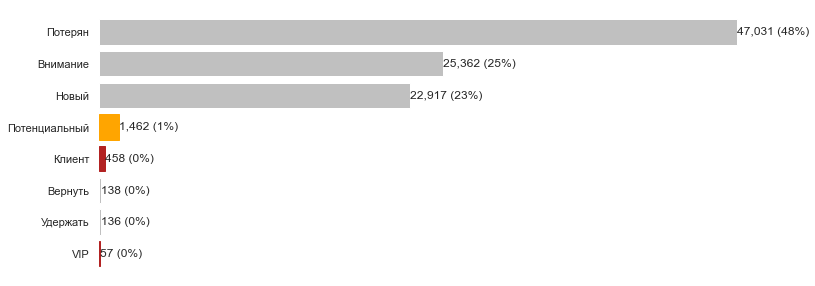

In [104]:
sns.set(font_scale=1,rc={'figure.figsize':(12,5)} )
segments_counts = rfm_data['group'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['VIP', 'Клиент']:
            bar.set_color('firebrick')
        if segments_counts.index[i] in ['Потенциальный']:
            bar.set_color('orange')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [105]:
revenue = rfm_data.groupby('group', as_index=False) \
        .agg({'monetary':'sum'}) \
        .sort_values(by='monetary', ascending=False)

In [106]:
revenue['monetary'] = revenue['monetary'].apply(lambda x: f"{x:.0f}")

In [107]:
revenue

,group,monetary
6,Потерян,6456689
2,Внимание,3418602
4,Новый,3213370
5,Потенциальный,182085
3,Клиент,59223
7,Удержать,21052
1,Вернуть,12066
0,VIP,6041


Нужно принимать меры для удержания и привлечения клиентов. Постоянных слишком мало, а потерянных слишком много(почти половина). Есть надежда на новых покупателей, а также покупателей, находящихся в зоне риска, которым нужно уделить внимание.
Все становится еще печальнее, если посмотреть на доход от пользователей. Хоть у нас и есть лояльные клиенты, но по сути они не приносят значимую прибыль. 